# **💼 Portfolio uchun amaliyot. Diabet kasalligiga tashxis qoʻyish**

In [1243]:
import pandas as pd
import numpy as np

## **Vazifa**

## Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.


## **Tarkib**

## Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

In [1244]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1245]:
df.shape

(768, 9)

### **Ustunlar**



Pregnancies: homilador bo'lish soni



Glucose: glyukozaga test natijasi



BloodPressure: diastolik qon bosimi (mm Hg)



SkinThickness: Triceps teri burmasining qalinligi (mm)



Insulin: 2 soatlik sarum insulini (mu U/ml)



BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)



DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi



Age: Yosh (yil)



Outcome: Class (0 - diabet yo'q, 1 - diabet)

In [1246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1247]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1248]:
df['Outcome'].value_counts()

# Biz aynan Outcome ustunini bashorat qilamiz demak diabeti yo'qlar 0 bilan berilagan va 500 inson ekan
# diabeti borlar 0 bilan berilgan 268 ta inson ekan bu df jadvali uchun

,count
Outcome,
0,500
1,268


In [1249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Bu pastdagi baelgilangan ustunlarda 0 qiymatlari mavjud ekan dastlab shu holicha ML qilgan edik xato yuqoriroq chiqdi.

### So'ngra o'sha 0 qiymatlarni replace bilan NaN qildik va ularni median qiymati bilan almashtirdik va natija biroz avvalgiga nisbatan aniqroq chiqdi garchi bu 0 qiymatlar haqiqatda 0 yokida NaN qiymatlar o'rniga 0 qo'yilgan yokida qo'yilmaganini bilmasakda.

### Ammo muhimi xatolik nisbatan kamaydi

In [1250]:
import numpy as np
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_replace:
    df[col] = df[col].replace(0, np.nan)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [1251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [1252]:
median_price = df['Glucose'].median()

df['Glucose'].fillna(median_price, inplace=True)

/tmp/ipython-input-2145324506.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(median_price, inplace=True)


In [1253]:
median_price = df['BloodPressure'].median()

df['BloodPressure'].fillna(median_price, inplace=True)

/tmp/ipython-input-199222083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].fillna(median_price, inplace=True)


In [1254]:
median_price = df['SkinThickness'].median()

df['SkinThickness'].fillna(median_price, inplace=True)

/tmp/ipython-input-2208716248.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].fillna(median_price, inplace=True)


In [1255]:
median_price = df['Insulin'].median()

df['Insulin'].fillna(median_price, inplace=True)

/tmp/ipython-input-1942720164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insulin'].fillna(median_price, inplace=True)


In [1256]:
median_price = df['BMI'].median()

df['BMI'].fillna(median_price, inplace=True)

/tmp/ipython-input-665465069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(median_price, inplace=True)


In [1257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Correlyatsiyasini tekshiramiz

In [1258]:
corrilyatsiya = df.corr().abs()
corrilyatsiya.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,0.033523,0.137327,0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


### Yuqorida umumiy barchasiga nisbatan correlyatsiya chiqarildi pastda

### faqat bitta Outcome uchun boshqa ustunlarning correlyatsiyasi tekshirildi hamda sort_values bilan birinchi correlyatsiyasi yuqori bo'lgandan pastga qarab kamiyish tartibida joylashadi

In [1259]:
corrilyatsiya1 = df.corrwith(df['Outcome']).abs().sort_values(ascending=False)
corrilyatsiya1.to_frame().style.background_gradient(cmap='coolwarm')
# Correlyatsiyasi bog'liq bo'lgan ustunlar juda kam ekan bu bashoratning aniqligiga ta'sir qiladi

,0
Outcome,1.000000
Glucose,0.492782
BMI,0.312038
Age,0.238356
Pregnancies,0.221898
SkinThickness,0.214873
Insulin,0.203790
DiabetesPedigreeFunction,0.173844
BloodPressure,0.165723


In [1260]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Etibor bersak har bir ustundagi min va max qiymatlar hammasida har xil.

### Huddi shunday har xil oraliqdagi ustun qiymatlari ML xato ishlashiga olib kelishi mumkin shuning uchun biz bu barcha qiymatlarni 0 va 1 oralig'idagi qiymatlarga almashtiramiz. yokida shunga yaqinroq qiymatlar oralig'iga qo'yamiz

### Bu kutubxona yordamida 0 va 1 oralig'iga emas balki bir biriga yaqin bo'lgan diapazonga keladi yani tafovuti katta bo'lmaydi

In [1261]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler.fit_transform(df)

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  2.01666174, -0.69376149, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [1262]:
housing_prepared = pd.DataFrame(
    standard_scaler.fit_transform(df),
    columns=df.columns,
    index=df.index
)

display(housing_prepared.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1.365896
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,-0.732120
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1.365896
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1.365896


In [1263]:
housing_prepared.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,4.625929e-18,5.782412e-18,-1.526557e-16,1.503427e-17,2.613650e-16,2.451743e-16,1.931325e-16,7.401487e-17
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.112653e-01,6.297816e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.542658e+00,4.104082e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00,1.365896e+00


# **ML ga tayyorlaymiz**

In [1264]:
X = housing_prepared.drop('Outcome', axis=1).values
y = df['Outcome']

# Outcome ustuni y ga va qolgan ustunlar X ga alohida qilinib saqlandi

In [1265]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# X_train, X_test, y_train, y_test 4 ta ustunga saqlab oldik va test qilishga 20 % ini

In [1266]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# StandardScaler bilan fit orqali ma'lumotlarni o'rganib qo'yayabmiz

StandardScaler()

In [1267]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler.transform(X_train): X_train (o'quv to'plami) dagi barcha ustunlarni standartlashtiradi.
# Bunda har bir ustun o'zining o'rtacha qiymati (mean) va standart og'ishiga
# (standard deviation) qarab o'zgartiriladi. Bu ma'lumotlarni bir xil shkalaga olib keladi.

# **Eng yaxshi k ni topish**

# **Grid Search yordamida**

##Tayyor GridSearch moduli bor sklearn da biz bundan eng maqul bo'lgan k qiymatini topamiz


In [1268]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15) # k-ni qiymati

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=15)

### Dastlab knn da n_neighbors=15 qilib ko'rdik taxminiy pastdagi kod orqali eng yaxshi k qiymatni qo'yib qaytadan kodni ishga tushiramiz

In [1269]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X, y)
# GridSearchCV - bu k kabi model parametrlarini (hyperparameters) avtomatik ravishda sinab ko'rib,
# modelning eng yaxshi ishlaydigan qiymatini topish uchun ishlatiladigan vositadir.

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [1270]:
knn_gscv.cv_results_['rank_test_score']
# bu GridSearchCV tomonidan sinovdan o'tkazilgan har bir k (yoki boshqa parametr)
# qiymatining ish faoliyati bo'yicha o'rnatilgan reytingi. Qiymat qanchalik kichik bo'lsa (masalan, 1),
# ushbu parametr kombinatsiyasi shunchalik yaxshi natija bergan hisoblanadi.

array([49, 48, 47, 44, 45, 46, 43, 41, 33, 40, 15, 30,  9, 34, 21,  9,  4,
        6,  5, 16,  6, 17, 13, 17,  1, 14,  3,  1, 11, 23, 20, 24, 25,  8,
       12, 28, 25, 27, 36, 22, 19, 31, 29, 32, 35, 37, 42, 39, 38],
      dtype=int32)

In [1271]:
knn_gscv.best_params_
# demak eng yaxshi k qiymat 17 ekan

{'n_neighbors': np.int64(25)}

In [1272]:
knn_gscv.best_score_
# bu GridSearchCV tomonidan topilgan eng yaxshi parametrlar kombinatsiyasining (bu yerda n_neighbors)
# kross-validatsiya bo'yicha erishilgan eng yuqori baho (skor) qiymatini qaytaradi. Bu modelning eng yaxshi ishlash ko'rsatkichidir.

np.float64(0.7721840251252015)

In [1273]:
import matplotlib.pyplot as plt
import seaborn as sns

### Bunda eng yaxshi k qiymati eng balandga ko'tarilgani bo'ladi yani bu yerda 14 ekan va buni tushunarli bo'lishi uchun grafik orqali ta'svirladik

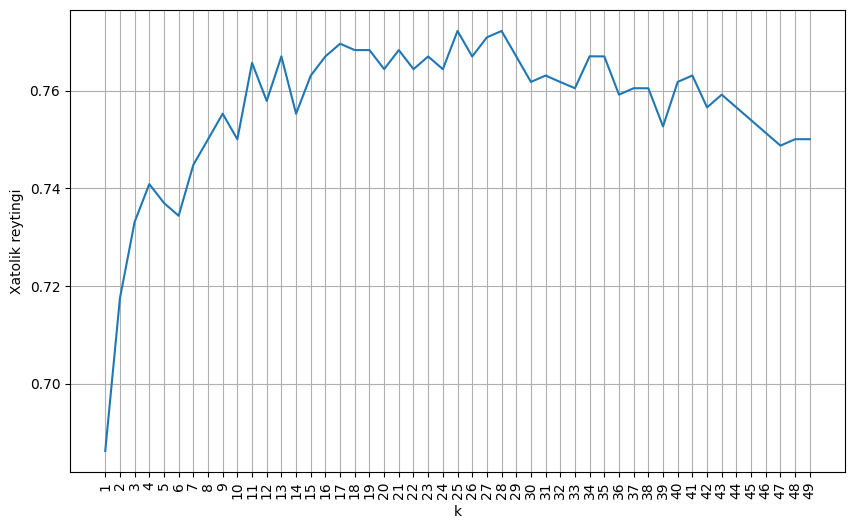

In [1274]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['mean_test_score'])
# n_neighbors (ya'ni, k qiymatlari) bo'yicha mean_test_score (o'rtacha test skori) ni aks ettiruvchi chiziqli grafik chizadi.
plt.xticks(param_grid['n_neighbors'], rotation=90)
# Bu qator x o'qi bo'ylab belgilar (ticks) sifatida n_neighbors qiymatlarini ko'rsatishni ta'minlaydi, bu esa grafikni o'qishni osonlashtiradi.
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

# **MACHINE LEARNING**

In [1275]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25) # k-ni qiymati

knn.fit(X_train_scaled, y_train)

# k ning eng yaxshi varianti 25 ekanligini yuqoridan aniqladik va qaytadan run qilyabmiz

KNeighborsClassifier(n_neighbors=25)

In [1276]:
y_predict = knn.predict(X_test_scaled)
# Ushbu qator tayyorlangan k-NN modeli yordamida sinov ma'lumotlaridagi (test data) y qiymatlarini bashorat qilish uchun ishlatiladi.

# **Aniqlik yani Bashorat qilganimiz va asl qiymatlarni bir nechta usullar orqali tekshirib ko'ramiz**

## mean_squared_error

In [1277]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)

print("RMSE=", np.sqrt(mse))

RMSE= 0.43394894666502914


## Confusion matrix

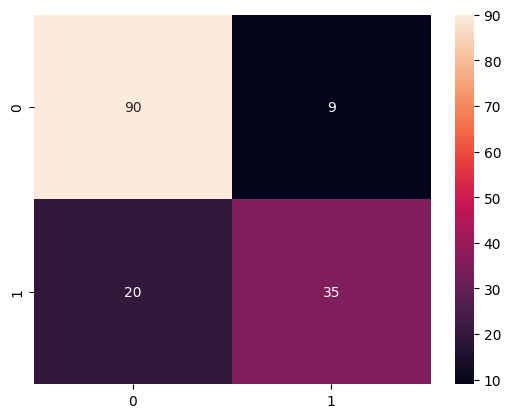

In [1278]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

### Outcome: Class (0 - diabet yo'q, 1 - diabet)

### Bunda diabeti yo'qlardan 100 tadan 90 to'g'ri, 10 ta xato

### diabeti borlardan 35 ta to'g'ri, 20 ta xato chiqadi

### Bu juda past ko'rsatgich chunki df ning correlyasiyasi Outcome ga nisbatan pastroq edi

In [1279]:
confusion_matrix(y_test, y_predict)


array([[90,  9],
       [20, 35]])

## **Cross-validation yordamida tekshirish**

In [1280]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv=10)
# cross_val_predict(estimator = knn, X = X, y = y, cv=10): Bu funksiya knn modelini butun X va y
# ma'lumotlar to'plamida o'qitish va bashorat qilish uchun cv=10 (10 qavatli kross-validatsiya) ni qo'llaydi.
# Natijada, har bir ma'lumot nuqtasi uchun modelning bashorati (predict) qaytariladi.

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification report:\n", classification_report(y, predict))

# Bu usul modelning ma'lumotlarning barcha qismlarida qanchalik yaxshi ishlashini baholashga yordam beradi
# va modelning yangi (ko'rilmagan) ma'lumotlarda qanday ishlashi haqida yanada ishonchli tasavvur beradi.

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.71      0.55      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768

